In [16]:
from plotnine import *
import pandas as pd

time = "2024-01-24_20:40"
time = "2024-01-30_14:24"
time = "2024-01-30_15:31" # classifier
time = "2024-01-31_11:30" # classifier_reg
time = "2024-02-04_19:53" # classifier_reg
time = "2024-02-04_22:36" # classifier_reg

# time = "2024-02-02_11:33"

df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_1/reproduce/results/{time}_results.csv")
# df has columns: ['Mean Squared Error', 'FoldID', 'Dataset', 'Index of Predicted Column', 'Predicted Column Name', 'Algorithm']
# drop Index of Predicted Column
df = df.drop(columns=['Index of Predicted Column'])

# group df by dataset, algorithm, and predicted column name
# find mean of mean squared error
df = df.groupby(['Dataset', 'Algorithm', 'Predicted Column Name']).mean().reset_index()

# filter where 'Dataset' contains 'log'
log_df = df[df['Dataset'].str.contains('log')]

log_df

,Dataset,Algorithm,Predicted Column Name,Mean Squared Error,FoldID
0,Dec22_all_log,Featureless,Absidia,0.398058,1.0
1,Dec22_all_log,Featureless,Amanita,0.246236,1.0
2,Dec22_all_log,Featureless,Amphinema,0.358022,1.0
3,Dec22_all_log,Featureless,Bacillus,0.443014,1.0
4,Dec22_all_log,Featureless,Bradyrhizobium,0.724202,1.0
...,...,...,...,...,...
772,Dec22_same_soil_log,LogisticRegGaussianGraphicalModel,Sphingomonas,0.403207,1.0
773,Dec22_same_soil_log,LogisticRegGaussianGraphicalModel,Tomentella,5.761838,1.0
774,Dec22_same_soil_log,LogisticRegGaussianGraphicalModel,Trichoderma,0.310680,1.0
775,Dec22_same_soil_log,LogisticRegGaussianGraphicalModel,Umbelopsis,1.016187,1.0


# REGRESSION

/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10


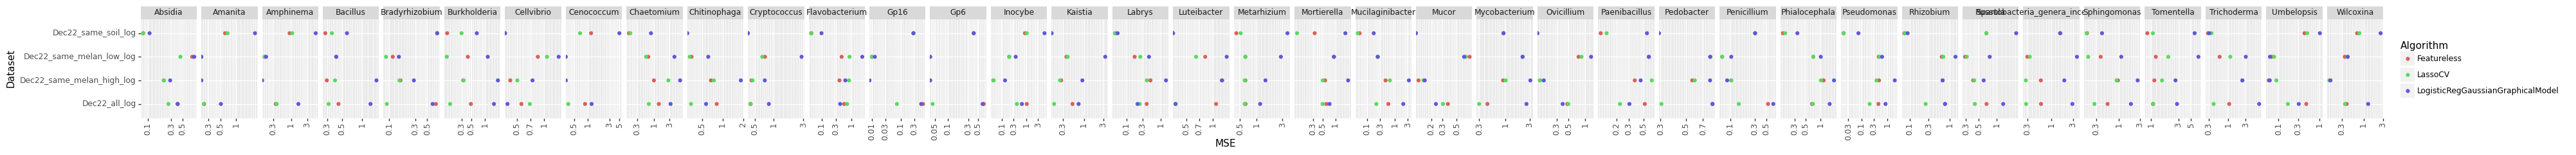

In [17]:

p = ggplot(log_df)
p = p + geom_point(aes(x="Mean Squared Error", y="Dataset", color="Algorithm"))
p = p + facet_grid("~Predicted Column Name", scales="free")
p = p + labs(
    x="MSE", y="Dataset"
)
p = p + theme(axis_text_x=element_text(angle=90))
p = p + theme(figure_size=(45, 2))
p = p + scale_x_log10()
print(p)

In [ ]:
p.save(filename = "plot.png", dpi=3000)


# CLASSIFICATION

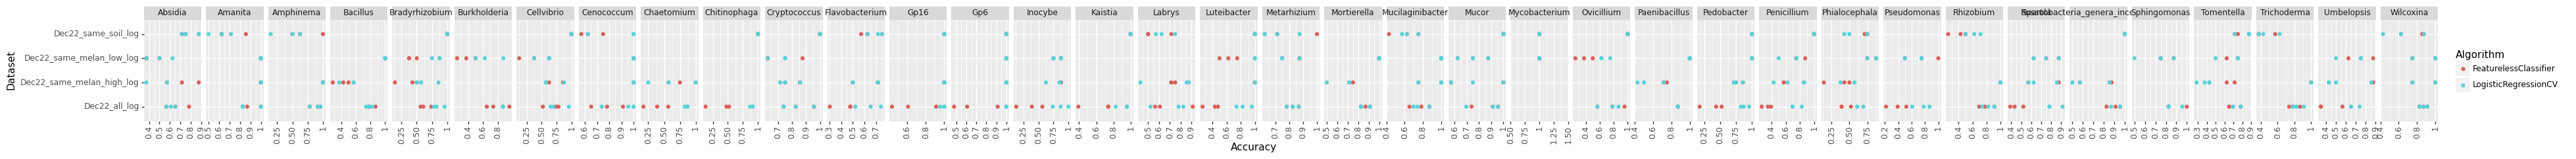

In [2]:

p = ggplot(log_df)
p = p + geom_point(aes(x="Test Accuracy", y="Dataset", color="Algorithm"))
p = p + facet_grid("~Predicted Column Name", scales="free")
p = p + labs(x="Accuracy", y="Dataset")
p = p + theme(axis_text_x=element_text(angle=90))
p = p + theme(figure_size=(45, 2))
# p = p + scale_x_log10()
print(p)

In [ ]:
p.save(filename = "binary_classification.png", dpi=300)

In [9]:
from plotnine import *
import pandas as pd
import numpy as np

time = "2024-01-24_20:40"
time = "2024-01-30_14:24"
time = "2024-01-30_15:31" # classifier
time = "2024-01-31_11:30" # classifier_reg
time = "2024-02-02_11:33"

df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_1/reproduce/results/{time}_results.csv")
# df has columns: ['Mean Squared Error', 'FoldID', 'Dataset', 'Index of Predicted Column', 'Predicted Column Name', 'Algorithm']
# drop Index of Predicted Column
df = df.drop(columns=['Index of Predicted Column'])

# convert 'FPR' and 'TPR' columns from string to array
df['FPR'] = df['FPR'].apply(lambda x:  np.fromstring(x[1:-1], sep=" ") )
df['TPR'] = df['TPR'].apply(lambda x:  np.fromstring(x[1:-1], sep=" ") )

# group df by dataset, algorithm, and predicted column name
# find mean of mean squared error
df = df.groupby(['Dataset', 'Algorithm', 'Predicted Column Name', 'FoldID']).mean().reset_index()

# filter where 'Dataset' contains 'log'
# log_df = df[df['Dataset'].str.contains('log')]

# log_df
df

/tmp/ipykernel_994835/2158659099.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,Dataset,Algorithm,Predicted Column Name,FoldID,Test Accuracy
0,Dec22_all_log,FeaturelessClassifier,Absidia,0,0.565217
1,Dec22_all_log,FeaturelessClassifier,Absidia,1,0.782609
2,Dec22_all_log,FeaturelessClassifier,Absidia,2,0.652174
3,Dec22_all_log,FeaturelessClassifier,Amanita,0,1.000000
4,Dec22_all_log,FeaturelessClassifier,Amanita,1,0.869565
...,...,...,...,...,...
1561,Dec22_same_soil_power,LogisticRegressionCV,Umbelopsis,1,0.750000
1562,Dec22_same_soil_power,LogisticRegressionCV,Umbelopsis,2,0.142857
1563,Dec22_same_soil_power,LogisticRegressionCV,Wilcoxina,0,0.625000
1564,Dec22_same_soil_power,LogisticRegressionCV,Wilcoxina,1,0.875000
